# Business Understanding
Our company is expanding into the aviation industry to diversify its business portfolio. Specifically, leadership is interested in purchasing and operating aircraft for both commercial and private use. However, they currently lack the data and expertise to evaluate potential risks in this highly regulated and safety-sensitive sector.

The key business challenge is to identify which aircraft types, conditions, and flight operations are the safest, so the company can make informed investment decisions. This includes understanding when and why accidents occur, which aircraft makes are involved, and what factors (such as weather or flight purpose) increase risk.

The objective of this project is to analyze aviation accident data and deliver three actionable recommendations to guide the aviation division in purchasing and operating low-risk aircraft

#  Data Cleaning and Preparation The dataset was first loaded and inspected to understand its structure and contents. I cleaned the column names for consistency, selected only the most relevant features (like injuries, weather, flight phase, etc.), and handled missing values by either filling them with defaults (like 0 for injuries) or dropping rows missing critical information.

I also created new columns such as `event_year` and `total_injuries` to support deeper analysis. After exploring key distributions—like weather conditions, flight purposes, and injury patterns—the data is now clean, structured, and ready for visualization and further exploration.


### Step 1: Load and Preview the Dataset

In this step, I import the Pandas library and load the aviation accident dataset from a CSV file. I then check the size of the dataset, view the column names, and preview the first five rows to understand the structure and contents of the data.


In [2]:
# 1. Import library
import pandas as pd
import numpy as np

# 2. Load the dataset
df = pd.read_csv('Aviation_Data.csv')

# 3. View the shape of the dataset
print("Rows, Columns:", df.shape)

# 4. Display column names
print("\nColumn Names:")
print(df.columns.tolist())

# 5. Preview the first 5 rows
df.head()


Rows, Columns: (90348, 31)

Column Names:
['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


C:\Users\Michael\AppData\Local\Temp\ipykernel_30940\1001891597.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Step 2: Clean Column Names

To make the column names easier to work with in Python, I convert them to lowercase, replace any periods (.) with underscores (_), and remove extra spaces. This helps avoid errors and improves code readabilit
 ---y.


In [3]:
# This line changes all column names: to lowercase ,replaces dots (.) with underscores (_) and removes extra spaces
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('.', '_', regex=False)
df.columns = df.columns.str.strip()

# Show the cleaned column names
print(df.columns.tolist())

['event_id', 'investigation_type', 'accident_number', 'event_date', 'location', 'country', 'latitude', 'longitude', 'airport_code', 'airport_name', 'injury_severity', 'aircraft_damage', 'aircraft_category', 'registration_number', 'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type', 'far_description', 'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'weather_condition', 'broad_phase_of_flight', 'report_status', 'publication_date']


### Step 3: Check for Missing Values

In this step, I check how many missi ) values exist in each column of the datase
. This gives a complete view of the data quality and helps decide which columns need cleaning or special handling.


In [4]:
# This shows how many missing (empty) values are in each column
missing = df.isnull().sum()

# Display only columns that have missing values, sorted from most to least
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


schedule                  77766
air_carrier               73700
far_description           58325
aircraft_category         58061
longitude                 55975
latitude                  55966
airport_code              40216
airport_name              37644
broad_phase_of_flight     28624
publication_date          16689
total_serious_injuries    13969
total_minor_injuries      13392
total_fatal_injuries      12860
engine_type                8555
report_status              7843
purpose_of_flight          7651
number_of_engines          7543
total_uninjured            7371
weather_condition          5951
aircraft_damage            4653
registration_number        2841
injury_severity            2459
country                    1685
amateur_built              1561
model                      1551
make                       1522
location                   1511
accident_number            1459
event_date                 1459
event_id                   1459
dtype: int64


### Step 4: Clean Column Names and Select Relevant Features

First, I cleaned the column names by converting them to lowercase, replacing periods (.) with underscores (_), and removing any extra spaces. This ensures consistency and prevents errors when referencing column names in code.

Then, I selected a subset of useful columns related to accident ID, flight details, injuries, and weather. These are the fields that are most relevant to the business question of identifying low-risk aircraft conditions.


In [5]:
# Step 3: Clean column names before selecting specific columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('.', '_', regex=False)
df.columns = df.columns.str.strip()

# A list of useful columns we want to keep
columns_to_keep = [
    'event_id',
    'accident_number',
    'event_date',
    'location',
    'country',
    'make',
    'purpose_of_flight',
    'total_fatal_injuries',
    'total_serious_injuries',
    'total_minor_injuries',
    'total_uninjured',
    'weather_condition',
    'broad_phase_of_flight',
    'publication_date'
]

# Keep only those columns in our dataset
df = df[columns_to_keep]

# Show the first few rows to confirm
df.head()



,event_id,accident_number,event_date,location,country,make,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,publication_date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Piper,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,19-09-1996
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",United States,Cessna,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,26-02-2007
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Rockwell,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,12-09-2000
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",United States,Cessna,Personal,1.0,2.0,NaN,0.0,VMC,Approach,16-04-1980


### Step 5: Recheck Missing Values in the Filtered Dataset

After reducing the dataset to only the relevant columns, I recheck for missing values. This helps verify how much cleaning is still needed in the remaining columns and ensures we are working with a clean subset of the original data.


In [6]:
missing = df.isnull().sum()
print(missing.sort_values(ascending=False))


broad_phase_of_flight     28624
publication_date          16689
total_serious_injuries    13969
total_minor_injuries      13392
total_fatal_injuries      12860
purpose_of_flight          7651
total_uninjured            7371
weather_condition          5951
country                    1685
make                       1522
location                   1511
event_id                   1459
accident_number            1459
event_date                 1459
dtype: int64


### Step 6: Clean Missing Values in Key Columns

In this step, I fill missing injury values with 0, assuming no injuries were recorded in those cases. Then, I remove rows that are missing essential information such as event ID, accident number, date, flight purpose, weather, and flight phase ,since these are critical for analysis. I also drop rows without location or country data, as they may be incomplete. Finally, I check for any remaining missing values to confirm the dataset is clean.


In [7]:
# Fill missing injury counts with 0
df['total_fatal_injuries'] = df['total_fatal_injuries'].fillna(0)
df['total_serious_injuries'] = df['total_serious_injuries'].fillna(0)
df['total_minor_injuries'] = df['total_minor_injuries'].fillna(0)
df['total_uninjured'] = df['total_uninjured'].fillna(0)

# Drop rows with missing values in key columns
df = df.dropna(subset=[
    'event_id',
    'accident_number',
    'event_date',
    'purpose_of_flight',
    'weather_condition',
    'broad_phase_of_flight'
])

# Drop missing location/country if you don’t plan to map crashes
df = df.dropna(subset=['location', 'country'])

# Check for remaining missing values
print("Remaining nulls:\n", df.isnull().sum())


Remaining nulls:
 event_id                      0
accident_number               0
event_date                    0
location                      0
country                       0
make                         11
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
publication_date          12362
dtype: int64


### Step 7: Convert Dates and Create `event_year`

To prepare for time-based analysis, I convert the `event_date` column to datetime format.
Then I extract the year into a new column called `event_year` so I can group and analyze data by year.


In [8]:
# Convert event_date from string to datetime format
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Extract the year from event_date and create a new column
df['event_year'] = df['event_date'].dt.year

# Preview to confirm
df[['event_date', 'event_year']].head()


,event_date,event_year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979


### Step 8: Calculate Total Injuries

In this step, I created a new column called `total_injuries` by adding up fatal, serious, and minor injuries for each accident. This new feature helps summarize the overall severity of each aviation incident in a single number, which is useful for risk analysis.


In [9]:
# Create a new column that adds up all types of injuries
df['total_injuries'] = (
    df['total_fatal_injuries'] +
    df['total_serious_injuries'] +
    df['total_minor_injuries']
)

# Show the first few rows to confirm
df[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_injuries']].head()


,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries
0,2.0,0.0,0.0,2.0
1,4.0,0.0,0.0,4.0
2,3.0,0.0,0.0,3.0
3,2.0,0.0,0.0,2.0
4,1.0,2.0,0.0,3.0


### Step 9: Explore Flight Accident Purposes

To understand which types of flights are most frequently involved in aviation incidents, I counted how many times each `purpose_of_flight` appears in the dataset.
This helps focus the analysis on the most common categories, such as Personal or Business flights.


In [10]:
# Show the top 10 most common flight purposes
df['purpose_of_flight'].value_counts().head(10)



purpose_of_flight
Personal              35415
Instructional          7686
Unknown                5796
Aerial Application     3628
Business               3357
Positioning            1158
Other Work Use          891
Ferry                   657
Public Aircraft         518
Aerial Observation      457
Name: count, dtype: int64

### Step 10: Explore Weather Conditions

This step counts how many accidents occurred under each type of weather condition (e.g. VMC for clear weather, IMC for poor visibility).
This gives insights into how weather affects aviation safety and helps identify whether certain conditions are more associated with accidents.


In [11]:
# Count each weather condition
df['weather_condition'].value_counts()


weather_condition
VMC    55303
IMC     4526
UNK      538
Name: count, dtype: int64

### Step 11: Analyze Injuries by Flight Phase

To identify which phases of flight are most dangerous, I grouped the data by the `broad_phase_of_flight` column and calculated the total number of injuries in each phase.
Sorting the results shows which phases contribute most to overall injuries, helping guide safety priorities.


In [12]:
# Sum injuries by flight phase
flight_phase_injuries = df.groupby('broad_phase_of_flight')['total_injuries'].sum().sort_values(ascending=False)
print(flight_phase_injuries)


broad_phase_of_flight
Cruise         12195.0
Takeoff        11838.0
Maneuvering     9060.0
Approach        8051.0
Landing         4800.0
Climb           3153.0
Descent         2285.0
Go-around       1578.0
Unknown          772.0
Standing         702.0
Taxi             608.0
Other            116.0
Name: total_injuries, dtype: float64


### Step 12 Identifying Outliers in Injury Data
This step helps identify any unusually high injury counts in the dataset. By summarizing the data and listing the highest injury values, we can detect potential outliers, accidents with exceptionally high numbers of injuries.
Recognizing these helps us understand how they might impact trends or averages in the analysis.

In [13]:
print(df[['total_injuries', 'event_year']].describe())
print(df['total_injuries'].sort_values(ascending=False).head(10))

       total_injuries    event_year
count    60367.000000  60367.000000
mean         0.913711   1992.726059
std          3.263854      7.502459
min          0.000000   1948.000000
25%          0.000000   1986.000000
50%          0.000000   1992.000000
75%          1.000000   1999.000000
max        283.000000   2007.000000
23534    283.0
42415    254.0
40104    230.0
43218    190.0
12519    163.0
1871     162.0
18431    162.0
32470    158.0
24810    158.0
35995    132.0
Name: total_injuries, dtype: float64


 ### Save the cleaned dataset

In [47]:
df.to_csv('cleaned_aviation_data.csv', index=False)
print("Cleaned file saved successfully.")


Cleaned file saved successfully.


# Exploratory Data Analysis (EDA) and Visualization
In this section, I use exploratory data analysis (EDA) and visualizations to uncover key patterns and trends in the aviation accident data. The goal is to better understand the causes, severity, and conditions of aviation accidents over time. Through line charts and bar graphs, I analyze factors such as accident trends, flight phases, weather conditions, and aircraft types. 

### Trend of Aviation Accidents Over Time
In this step, I create a line chart to show how the number of aviation accidents has changed each year. This helps us understand whether accidents are becoming more or less frequent over time, which can guide the company in assessing whether now is a safe time to enter the aviation industry.

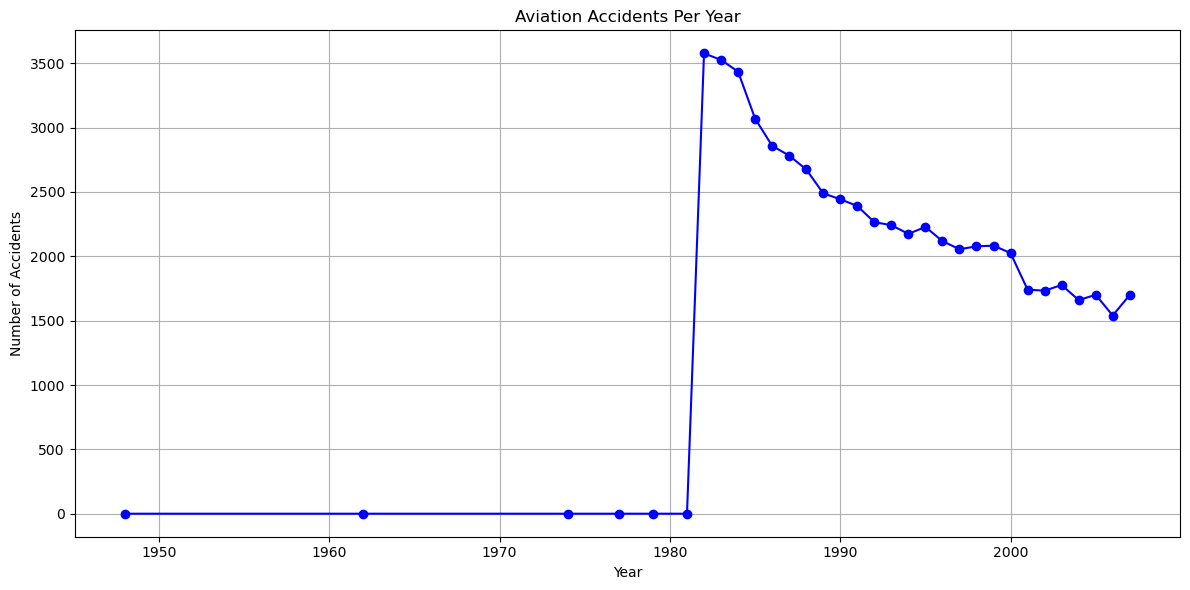

In [29]:
import matplotlib.pyplot as plt

# Count number of accidents per year
accidents_per_year = df['event_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='blue')
plt.title('Aviation Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


###### Business relevance:
Supports our case for entering the aviation industry — if the trend is declining or stable, the risk appears manageable. Use this to build trust that the industry is becoming safer.
___

### Total Injuries Over Time
This line chart shows the total number of injuries reported in aviation accidents each year. It helps us evaluate whether the severity of accidents is increasing or decreasing over time. This is crucial for understanding long-term safety trends and determining whether the risk level in aviation is rising or falling.

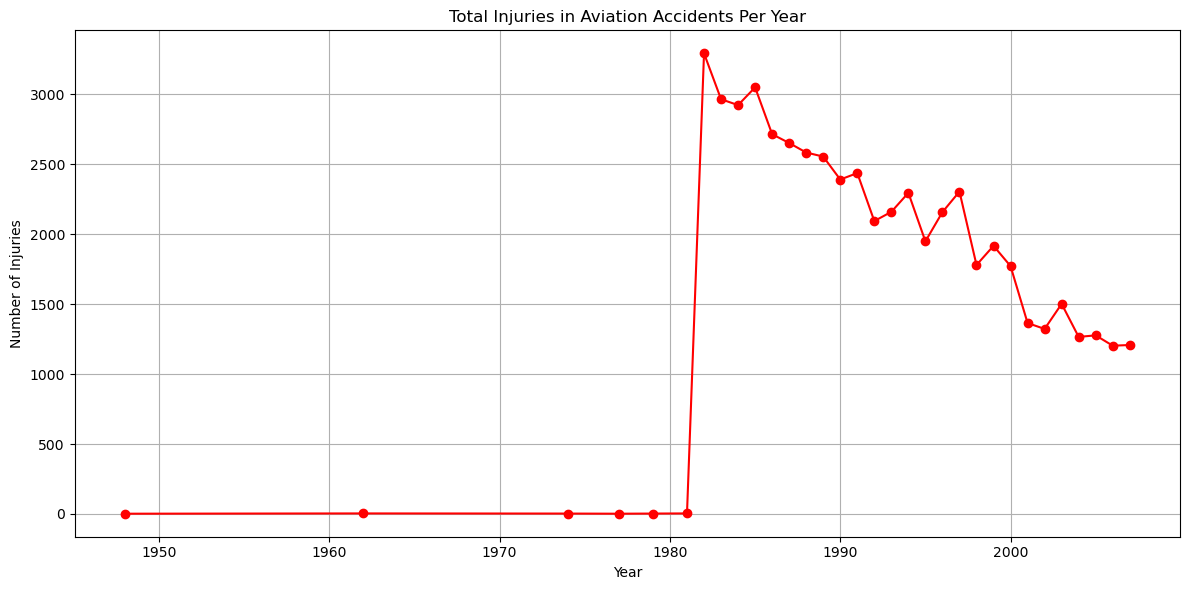

In [15]:
# Group by year and sum total injuries per year
injuries_per_year = df.groupby('event_year')['total_injuries'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(injuries_per_year.index, injuries_per_year.values, marker='o', color='red')
plt.title('Total Injuries in Aviation Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()


###### Business relevance:
The number of injuries drop over time, it signals improved safety outcomes. This signals that aircraft safety is not only improving in frequency but also in severity.
___

### Accidents by Phase of Flight
This bar chart displays the number of accidents that occurred during different phases of flight (e.g., takeoff, cruise, landing). It helps identify which part of the flight is most prone to accidents. This is valuable for evaluating aircraft safety by operational stage and can guide decisions on pilot training or equipment focus.

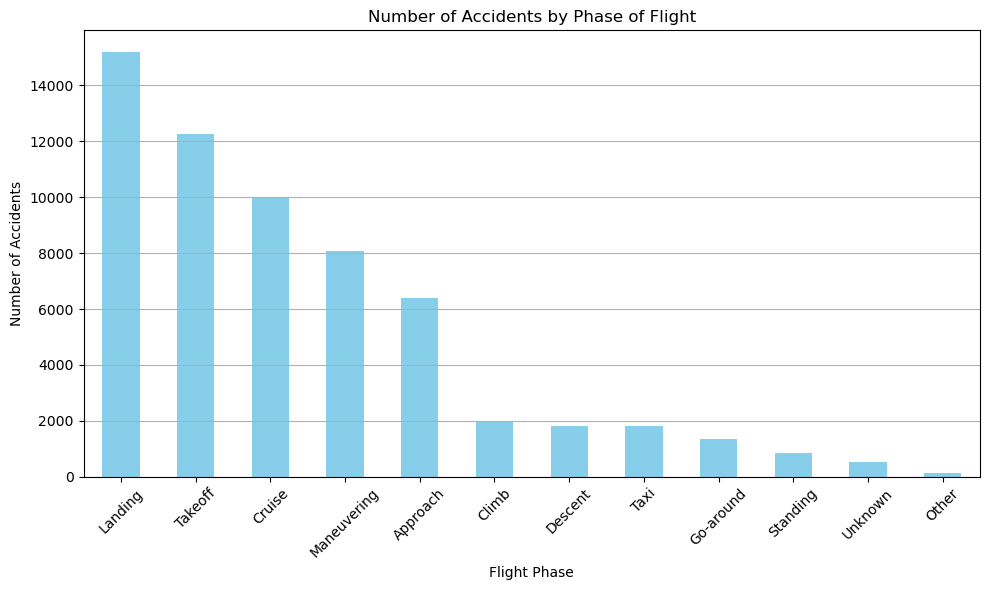

In [16]:
# Count number of accidents per flight phase
accidents_by_phase = df['broad_phase_of_flight'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
accidents_by_phase.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Phase of Flight')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###### Business relevance:
Tells us that the training priorities for pilots.This shows that majority of the accidents happen during landing, thus a lot of training of the pilots should be done during landing and takeoff. Which is crucial for forming risk reduction strategies.
___

### Total Injuries by Phase of Flight
This bar chart shows the total number of injuries (fatal, serious, and minor combined) for each phase of flight. While the previous chart showed how often accidents happen, this one reveals how severe those accidents are. It helps identify which flight phases pose the greatest risk in terms of human impact.


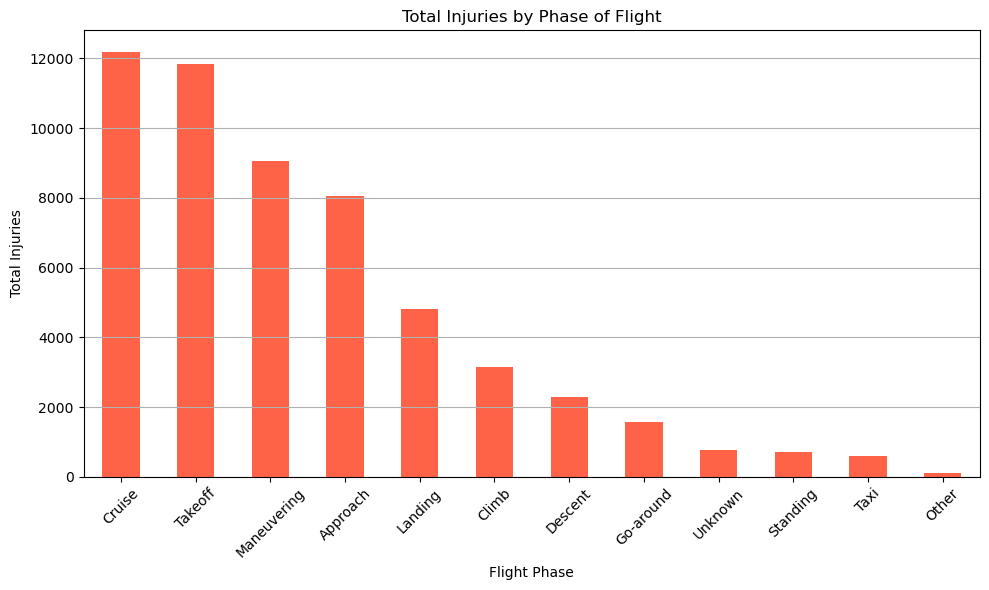

In [17]:
# Sum injuries grouped by phase of flight
injuries_by_phase = df.groupby('broad_phase_of_flight')['total_injuries'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
injuries_by_phase.plot(kind='bar', color='tomato')
plt.title('Total Injuries by Phase of Flight')
plt.xlabel('Flight Phase')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###### Business relevance:
Most injuries occur during cruise, that phase becomes a priority area for pilot training and aircraft type selection. Helps mitigate injury impact.
___

### Number of Accidents by Weather Condition
This bar chart shows how many accidents occurred under each weather condition — for example, VMC (Visual Meteorological Conditions) vs IMC (Instrument Meteorological Conditions). This visualization helps assess how weather impacts accident frequency and whether poor visibility or bad weather significantly increases aviation risk.

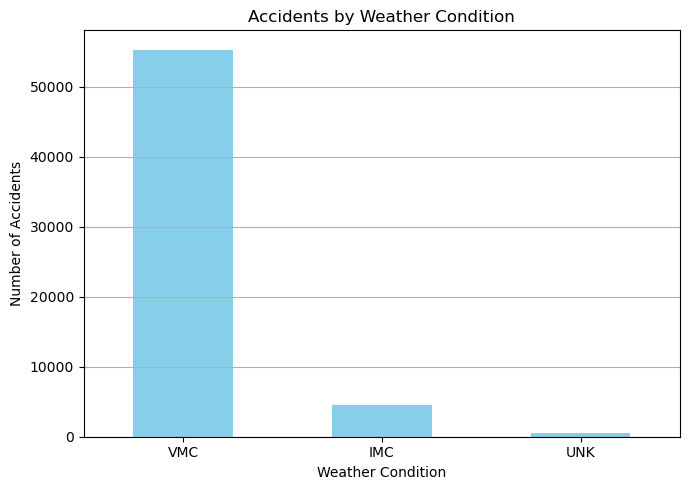

In [18]:
# Count accidents by weather condition
accidents_by_weather = df['weather_condition'].value_counts()

# Plot
plt.figure(figsize=(7, 5))
accidents_by_weather.plot(kind='bar', color='skyblue')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###### Business relevance:
Contrary to expectations, most aviation accidents happened in good weather, not during storms or low-visibility conditions. This suggests that human error, mechanical issues, or operational procedures may be more responsible for accidents than weather alone.
This finding challenges the assumption that poor weather is the primary safety concern. The company should:
- Not over-rely on weather conditions as a risk filter.
- Focus more on aircraft reliability, pilot training, and flight phase safety.
- Ensure that risk assessments consider human and mechanical factors, even during clear-weather operations.
- Consider investing in aircraft with strong safety records regardless of weather handling features.
___

### Accidents by Purpose of Flight
This chart displays how accident frequency varies by the purpose of flight (e.g., Personal, Business, Instructional, Aerial Survey). It helps identify which types of operations are more prone to accidents. This is essential when deciding what types of flight operations (e.g., commercial vs. personal) to prioritize or avoid when entering the aviation business.

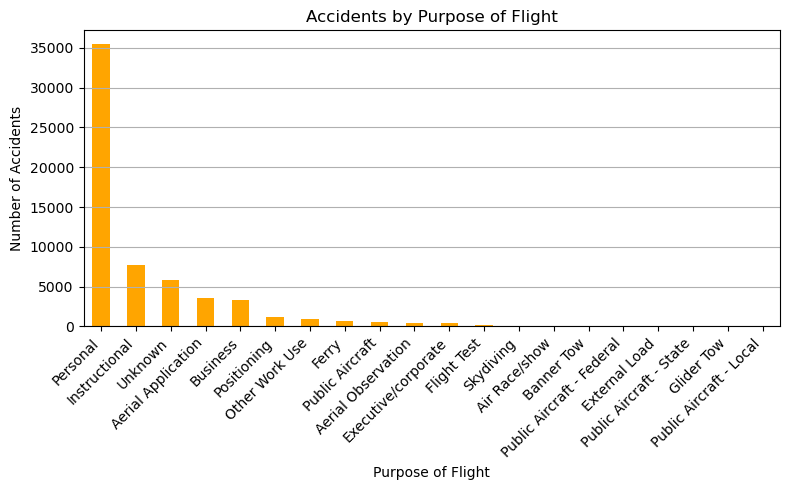

In [36]:
# Count accidents by flight purpose
accidents_by_purpose = df['purpose_of_flight'].value_counts().head(20)

# Plot
plt.figure(figsize=(8, 5))
accidents_by_purpose.plot(kind='bar', color='orange')
plt.title('Accidents by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###### Business relevance:
Supports decisions on which operations to prioritize:
- Personal flights have the most number of accidents, that’s a riskier segment to enter.
- Avoid investing in high-risk categories like personal flights and Instructional flights.
______

### Total Injuries by Purpose of Flight
This bar chart shows the total number of injuries (fatal, serious, and minor combined) for each purpose of flight. Unlike the previous chart, this one highlights how dangerous each flight type tends to be—not just how often accidents occur. It’s a useful way to weigh frequency versus severity, helping identify high-risk flight types to avoid.

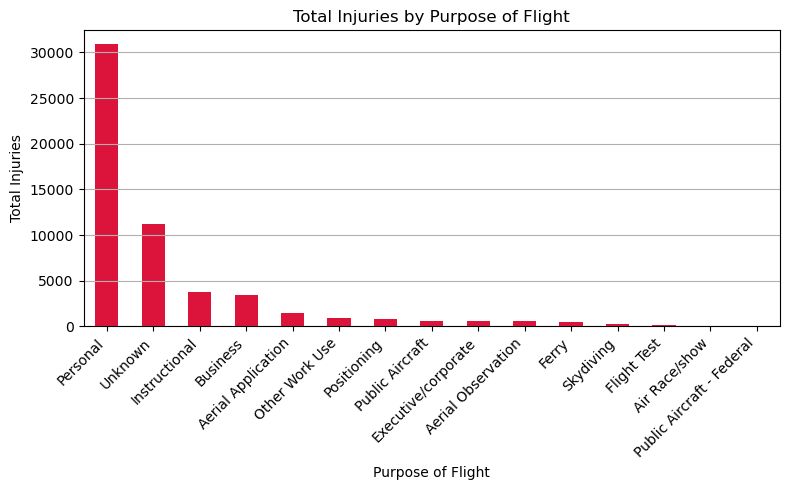

In [37]:
# Group by purpose and sum total injuries
injuries_by_purpose = df.groupby('purpose_of_flight')['total_injuries'].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(8, 5))
injuries_by_purpose.plot(kind='bar', color='crimson')
plt.title('Total Injuries by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###### Business relevance:
Highlights operations that are both frequent and severe (e.g., high injuries + high accident count). Can help shape your fleet allocation strategy and insurance planning.
What we see:
- The highest total injuries occur in Personal, Unknown, and Instructional flights.
- The lowest total injuries are seen in Public Aircraft, air race show, flight test, Sky diving, Ferry, Aerial Observation, Executive/Corporate, and Public Aircraft flights.
___

### Fatal Injuries by Aircraft Make
This chart displays the top 10 aircraft manufacturers (makes) with the highest number of fatal injuries across all recorded accidents. It helps identify which aircraft makes have been associated with the most deadly incidents — offering a strong data-backed clue on which makes may pose higher risks in operations.

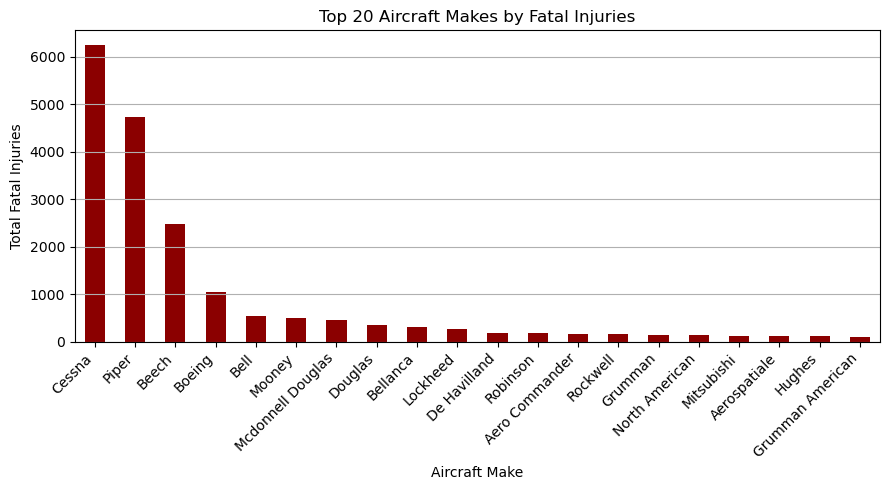

In [40]:
# Group by aircraft make and sum total fatal injuries
fatal_by_make = df.groupby('make')['total_fatal_injuries'].sum().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(9, 5))
fatal_by_make.plot(kind='bar', color='darkred')
plt.title('Top 20 Aircraft Makes by Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###### Business relevance:
Strong input for your recommendation: Avoid aircraft makes with a track record of high fatalities.
Here we see:
- Cessna and Piper to have the most number of total fatal injuries
- Grumman American, Hughes, Aerospatiale, Mitsubishi, North American, Grumman, Rockwell & Aero Commander have the least number of injuries.
_______

### Number of Accidents by Aircraft Make (Top 20)
This bar chart shows which aircraft manufacturers are involved in the most accidents overall. It’s useful for identifying commonly used aircraft that may have a high accident rate, regardless of severity.

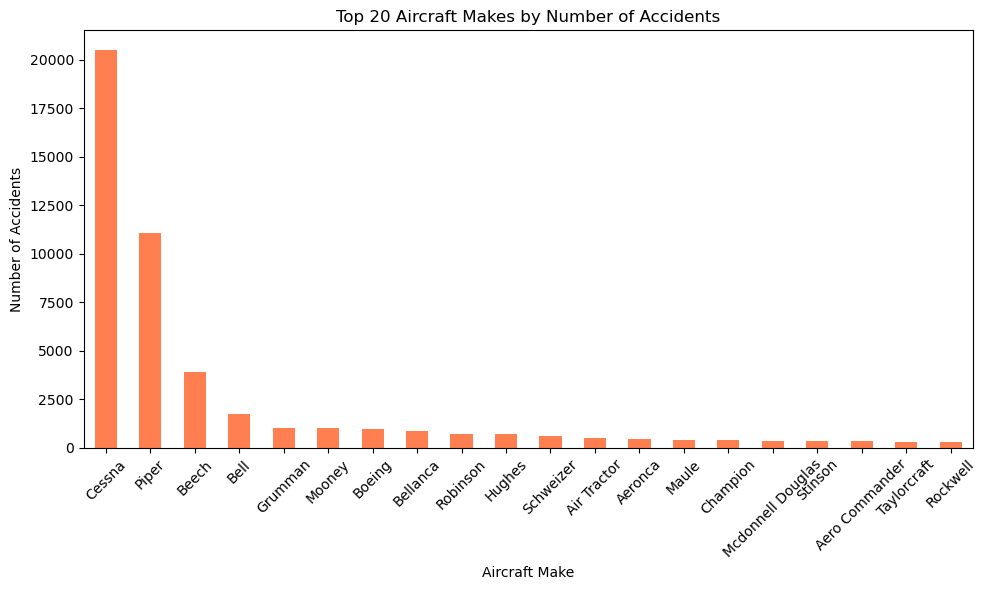

In [39]:
# First, make sure 'make' column is in the dataframe
if 'make' not in df.columns:
    df = pd.read_csv('Aviation_Data.csv')
    df.columns = df.columns.str.lower().str.replace('.', '_').str.strip()

# Fill missing makes with 'Unknown' to avoid issues
df['make'] = df['make'].fillna('Unknown')

# Count accidents by aircraft make
accidents_by_make = df['make'].value_counts().head(20)

# Plot
plt.figure(figsize=(10, 6))
accidents_by_make.plot(kind='bar', color='coral')
plt.title('Top 20 Aircraft Makes by Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###### Business relevance:
What does this show us:
- Cessna and the Piper have the highest number of accidents
- Rockwell, Taylorcraft, Aero Commander, Stinson, Mcdonnell Douglas, Champion, Maule, Aeronca, Air Tractor, Schweizer, Hughes, Robinson, Bellanca and Boeing have the least number of accidents.
___

### Average Injuries per Accident by Flight Purpose (Top 20)
Instead of just looking at frequency, this bar chart reveals which flight purposes tend to have the highest average number of injuries per accident — helping us understand not just how often, but how bad those accidents tend to be.

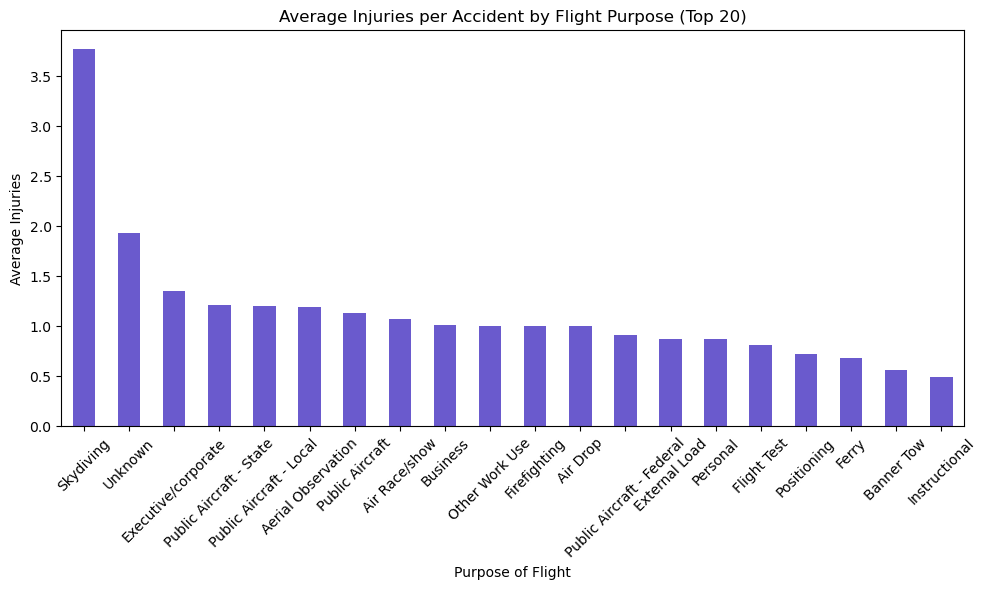

In [43]:
# Calculate average injuries per accident by purpose
avg_injuries_by_purpose = df.groupby('purpose_of_flight')['total_injuries'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
avg_injuries_by_purpose.plot(kind='bar', color='slateblue')
plt.title('Average Injuries per Accident by Flight Purpose (Top 20)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Average Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###### Business relevance:
- This bar chart displays the top 20 flight purposes ranked by the average number of injuries per accident.
- "Skydiving" has the highest average, at over 3.5 injuries per accident. This value is nearly double the next highest category.
- The "Unknown" category has the second-highest average, at approximately 2.0.
- Several other categories, including "Executive/corporate," "Public Aircraft," and "Aerial Observation," have averages between 1.0 and 1.5.

- The chart concludes that, on a per-accident basis, skydiving is the most dangerous activity shown. When an accident occurs during a skydiving flight, it results in a higher number of injuries on average than accidents involving other flight purposes.
- The high ranking of the "Unknown" purpose suggests that in accidents with a higher number of injuries, the flight's purpose may be more difficult to ascertain or is not recorded.
___

### Distribution of Injuries per Year
It shows how the total number of injuries per accident is distributed in each year (variation, extremes, outliers).
This helps us spot:
Years with unusually high injury counts,
General spread of injury severity,
Whether aviation incidents are becoming more predictable or erratic.

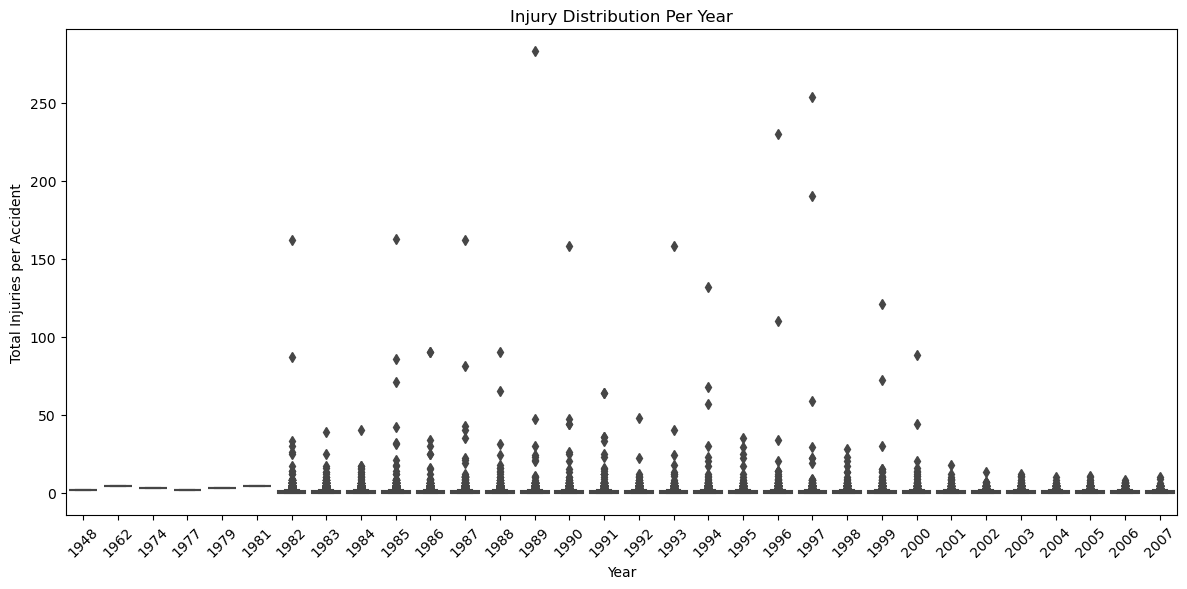

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='event_year', y='total_injuries', data=df)
plt.title('Injury Distribution Per Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries per Accident')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###### Business Relevance
The Box Plot of Total Injuries and the Injury Distribution Per Year plot both strongly indicate that the vast majority of aviation accidents result in a very low number of injuries. The median number of injuries per accident is consistently close to zero across the years.

However, both charts also highlight the presence of numerous outliers. These represent a small number of severe accidents that lead to a significantly higher number of casualties, with some events causing over 250 injuries. The yearly distribution suggests that the frequency and magnitude of these high-injury events may have decreased in the early 2000s compared to previous decades.

### Total Injuries vs. Total Uninjured
We compare the number of people injured vs. uninjured per accident.
This helps us understand:
Whether accidents are usually severe (many injuries) or mild (many uninjured),
If there’s a correlation between injury count and how many survive,
Clusters of high-risk events (many injuries, few survivors).

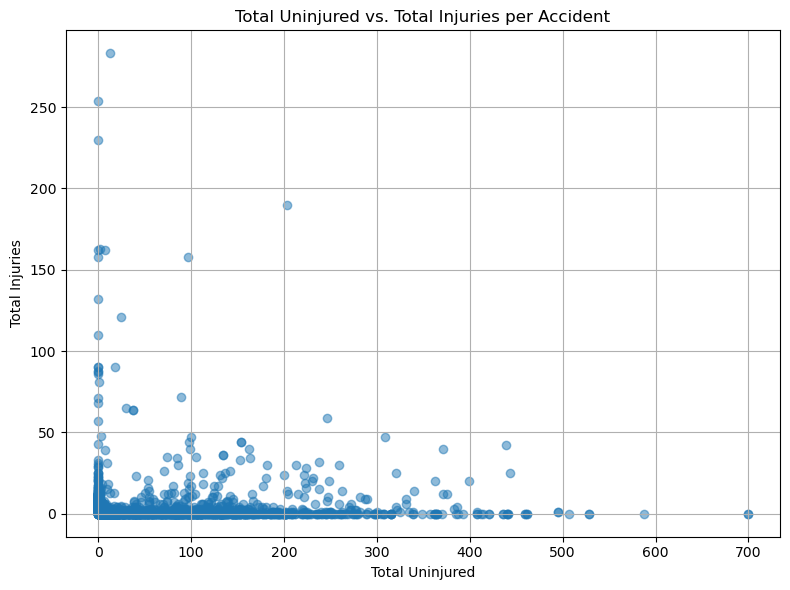

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['total_uninjured'], df['total_injuries'], alpha=0.5)
plt.title('Total Uninjured vs. Total Injuries per Accident')
plt.xlabel('Total Uninjured')
plt.ylabel('Total Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()


###### Business relevance:
This scatter plot charts the number of uninjured people against the number of injured people for each accident.
A large majority of the data points are clustered in the bottom-left corner of the graph, where both total uninjured and total injuries are low.
There is a visible inverse pattern: incidents with a high number of injuries (high on the y-axis) have a low number of uninjured people (low on the x-axis), and vice versa.
There are distinct sets of points along the y-axis (low uninjured) and the x-axis (low injuries).

The heavy cluster in the corner concludes that most accidents involve aircraft with a small number of occupants.
The plot concludes there's a logical trade-off between the number of injured and uninjured in any single accident. An event is either a high-injury event or a high-survivor event, but rarely both. The plot effectively distinguishes between minor incidents (bottom-left) and more catastrophic accidents where most people on board were either injured (points up the y-axis) or uninjured (points along the x-axis).

___

### Injuries by Flight Phase (Grouped by Severity Type)
This chart helps us understand how injury types (fatal, serious, minor) are distributed across different phases of flight.
It provides both frequency and severity context in a single visualization, ideal for comparing which phases are more dangerous and in what way.

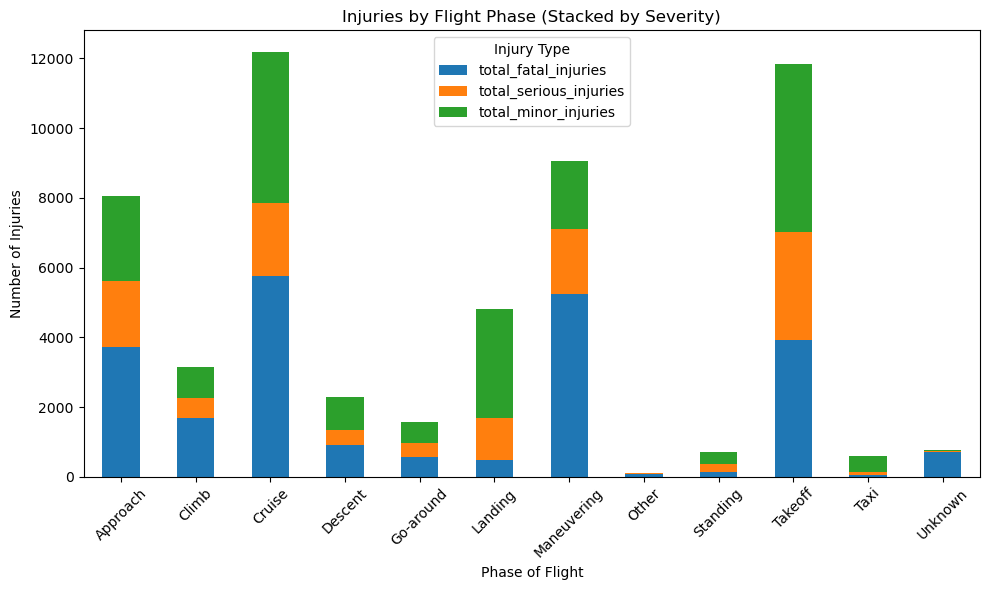

In [26]:
import matplotlib.pyplot as plt

# Group by flight phase and sum each injury type
stacked_data = df.groupby('broad_phase_of_flight')[
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']
].sum()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Injuries by Flight Phase (Stacked by Severity)')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()


###### Business relevance:
This stacked bar chart shows the total number of injuries categorized by the phase of flight, with each bar segmented by injury severity (fatal, serious, minor).
The "Cruise" phase has the highest total number of injuries, and visually has the largest blue segment, representing the highest absolute number of fatal injuries.
The "Takeoff" and "Approach" phases also have very high total injury counts. Both have substantial segments for fatal (blue) and serious (orange) injuries.
"Maneuvering" has a lower total injury count but has a significant proportion of fatal and serious injuries.
Phases like "Landing," "Climb," and "Descent" have moderate injury counts, while "Taxi," "Standing," and "Go-around" have the lowest.

The visual concludes that not all phases of flight are equally risky. The cruise, takeoff, and approach phases are where the vast majority of all injuries, and particularly fatal injuries, occur.

The cruise phase, often perceived as the safest part of a flight, is the deadliest phase in terms of the absolute number of fatalities from accidents. This highlights that while accidents during cruise may be less frequent, they are the most severe in outcome.
___

### Total Uninjured vs. Total Injuries
This shows the relationship between the number of people uninjured and the number of injuries in each accident.
Each point represents a single aviation accident. By looking at the pattern of the points, we can see whether there is any correlation between how many people escaped without harm and how many were injured. This can help us better understand the distribution and severity of accidents.

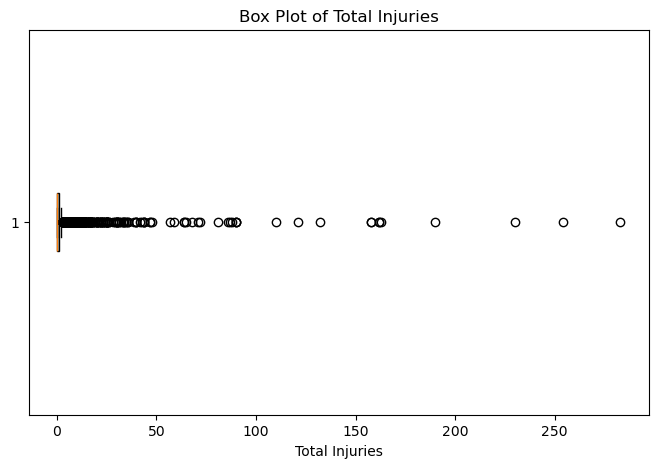

In [28]:
import matplotlib.pyplot as plt

# Create a box plot for total injuries
plt.figure(figsize=(8, 5))
plt.boxplot(df['total_injuries'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add title and label
plt.title('Box Plot of Total Injuries')
plt.xlabel('Total Injuries')

# Show plot
plt.show()


###### Business relevance:
This horizontal box plot shows the overall distribution of total injuries across all recorded accidents.
The main box, representing the 25th to 75th percentile, is extremely compressed at the far left of the chart, close to a value of zero.
The median value is 1.
A large number of data points, represented by circles, are scattered to the right of the main box, extending up to nearly 300 injuries.

The distribution of total injuries is extremely right-skewed. This concludes that a vast majority of accidents cause a very small number of injuries.
A small fraction of accidents (the outliers) are responsible for a disproportionately large number of injuries. This confirms that mass-casualty events are rare compared to the total number of accidents.
___